<a href="https://colab.research.google.com/github/Mafaz03/Test-Checkpoints/blob/Incomplete/Driving_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
print(".......Mounting.......")

Mounted at /content/drive/
.......Mounting.......


In [2]:
import zipfile

In [3]:
with zipfile.ZipFile("/content/drive/MyDrive/unnati_phase1_data_revised.zip") as f:
  f.extractall()

In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
data = pd.read_csv("/content/unnati_phase1_data_revised.csv")
data

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58
...,...,...,...,...,...,...,...
21320,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30
21321,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34
21322,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24
21323,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23


In [6]:
data.describe()

,Lat,Long,Vehicle,Speed
count,21325.000000,21325.000000,21325.000000,21325.000000
mean,12.900458,80.118533,2910.684689,38.403845
std,0.147163,0.107352,1747.621338,16.847610
min,12.338685,79.774120,805.000000,0.000000
25%,12.850645,80.065984,805.000000,27.000000
50%,12.942436,80.129990,2846.000000,41.000000
75%,13.006814,80.205680,5339.000000,54.000000
max,13.182797,80.316079,5339.000000,65.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    21325 non-null  object 
 1   Date     21325 non-null  object 
 2   Time     21325 non-null  object 
 3   Lat      21325 non-null  float64
 4   Long     21325 non-null  float64
 5   Vehicle  21325 non-null  int64  
 6   Speed    21325 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [8]:
data

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58
...,...,...,...,...,...,...,...
21320,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30
21321,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34
21322,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24
21323,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23


In [9]:
data["Lat"] = data["Lat"].astype(float)
data["Long"] = data["Long"].astype(float)
data["Vehicle"] = data["Vehicle"].astype(int)
data["Speed"] = data["Speed"].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    21325 non-null  object 
 1   Date     21325 non-null  object 
 2   Time     21325 non-null  object 
 3   Lat      21325 non-null  float64
 4   Long     21325 non-null  float64
 5   Vehicle  21325 non-null  int64  
 6   Speed    21325 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [11]:
data["Alert"].unique()

array(['cas_ldw', 'cas_hmw', 'cas_fcw', 'cas_pcw'], dtype=object)

*   FCW - Forward Collision Warning
*   PCW - Pedestrian Collision Warning
*   HMW - Headway Monitoring and Warning (Unsafe Distance)
*   LDW - Lane Departure Warning


In [12]:
data["Alert"].unique()

array(['cas_ldw', 'cas_hmw', 'cas_fcw', 'cas_pcw'], dtype=object)

In [13]:
data["Vehicle"].unique()

array([2846,  805, 1995, 5339, 3143])

In [14]:
alert_freq = data.groupby("Vehicle" , as_index=False )["Alert"].count()
alert_freq

,Vehicle,Alert
0,805,6875
1,1995,18
2,2846,5686
3,3143,2904
4,5339,5842


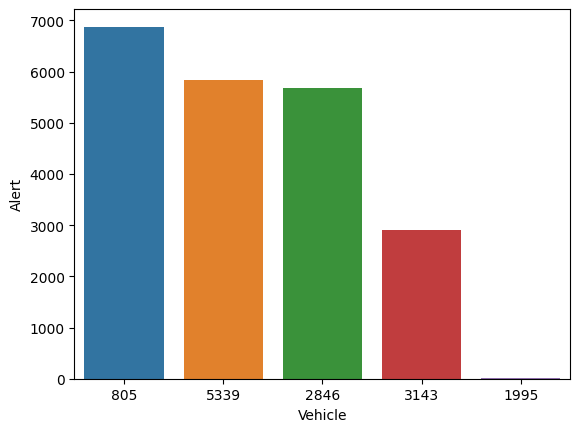

In [15]:
sns.barplot(data = alert_freq , x = 'Vehicle', y = 'Alert' ,order = alert_freq.sort_values('Alert',ascending = False).Vehicle)
plt.show()

In [16]:
data["Hour"] = data["Time"].str.slice(start = 0 , stop = 2).astype(int)
data.head(10)

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48,5
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58,5
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57,5
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49,5
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58,5
5,cas_ldw,2022-06-01,05:38:21,12.903877,80.094272,2846,54,5
6,cas_ldw,2022-06-01,05:38:41,12.906194,80.095953,2846,58,5
7,cas_ldw,2022-06-01,05:40:21,12.915664,80.103135,2846,62,5
8,cas_ldw,2022-06-01,05:41:17,12.918451,80.109058,2846,51,5
9,cas_ldw,2022-06-01,05:41:25,12.919239,80.110028,2846,47,5


In [17]:
hour_freq = data["Hour"].value_counts().sort_values(ascending=False)
hour_freq

17    4930
7     4508
8     3819
16    3677
18    1566
6     1547
19     359
5      149
12     143
20     134
15     112
9      106
11      98
10      74
14      50
13      42
21      11
Name: Hour, dtype: int64

<Axes: >

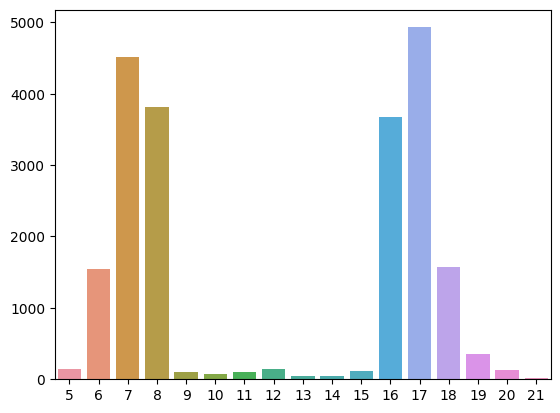

In [18]:
sns.barplot(x = hour_freq.index , y = hour_freq.values)

In [19]:
Alert_by_time = pd.DataFrame(data.groupby("Hour",as_index=False)["Alert"].value_counts())
Alert_by_time.head(10)

,Hour,Alert,count
0,5,cas_ldw,113
1,5,cas_hmw,32
2,5,cas_pcw,2
3,5,cas_fcw,2
4,6,cas_ldw,1038
5,6,cas_hmw,471
6,6,cas_fcw,19
7,6,cas_pcw,19
8,7,cas_hmw,2462
9,7,cas_ldw,1337


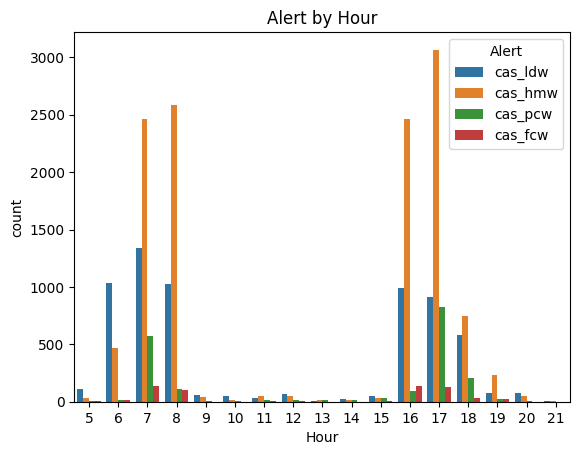

In [20]:
sns.barplot(data = Alert_by_time ,
            x = 'Hour' ,
            y = 'count' ,
            hue = 'Alert')

plt.title("Alert by Hour")
plt.show()

*   FCW - Forward Collision Warning
*   PCW - Pedestrian Collision Warning
*   HMW - Headway Monitoring and Warning (Unsafe Distance)
*   LDW - Lane Departure Warning

In [21]:
data

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48,5
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58,5
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57,5
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49,5
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58,5
...,...,...,...,...,...,...,...,...
21320,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30,18
21321,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34,18
21322,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24,18
21323,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23,18


In [22]:
data.Vehicle.unique()

array([2846,  805, 1995, 5339, 3143])

In [23]:
def convert_time_column_to_seconds(df, time_column_name):
    # Splitting the time column into hours, minutes, and seconds
    df[['hours', 'minutes', 'seconds']] = df[time_column_name].str.split(':', expand=True).astype(int)

    # Calculating the total seconds
    df['total_seconds'] = df['hours'] * 3600 + df['minutes'] * 60 + df['seconds']

    # Dropping the intermediate columns
    df.drop(['hours', 'minutes', 'seconds'], axis=1, inplace=True)

    return df

In [24]:
data = convert_time_column_to_seconds(data , "Time")

In [25]:
data_Veh_1 = data[data.Vehicle == 2846].reset_index(drop=True)
data_Veh_2 = data[data.Vehicle == 805].reset_index(drop=True)
data_Veh_3 = data[data.Vehicle == 1995].reset_index(drop=True)
data_Veh_4 = data[data.Vehicle == 5339].reset_index(drop=True)
data_Veh_5 = data[data.Vehicle == 3143].reset_index(drop=True)

data_Veh_1.shape , data_Veh_2.shape , data_Veh_3.shape , data_Veh_4.shape , data_Veh_5.shape

((5686, 9), (6875, 9), (18, 9), (5842, 9), (2904, 9))

In [26]:
data_Veh_1.Alert.value_counts()

cas_ldw    2741
cas_hmw    2409
cas_pcw     391
cas_fcw     145
Name: Alert, dtype: int64

In [27]:
data_Veh_2.Alert.value_counts()

cas_hmw    4227
cas_ldw    2052
cas_pcw     438
cas_fcw     158
Name: Alert, dtype: int64

In [28]:
data_Veh_3.Alert.value_counts()

cas_ldw    8
cas_hmw    8
cas_pcw    1
cas_fcw    1
Name: Alert, dtype: int64

In [29]:
data_Veh_4.Alert.value_counts()

cas_hmw    4117
cas_pcw     767
cas_ldw     754
cas_fcw     204
Name: Alert, dtype: int64

In [30]:
data_Veh_5.Alert.value_counts()

cas_hmw    1567
cas_ldw     876
cas_pcw     379
cas_fcw      82
Name: Alert, dtype: int64

In [31]:
def follow_ups(Vehicle_data : pd.DataFrame , time_list : list[int,...] = [5,2,1,0.5,0.08]):

  """
  Takes in DataFrame and returns the percentage of follow up of combination of ldw and hmw alert at given intervals
  Vehicle_Data = DataFrame
  time_list = list
  """

  total_follow_ups_per_5_min = 0
  total_follow_ups_per_2_min = 0
  total_follow_ups_per_1_min = 0

  follow_up_df = pd.DataFrame(columns = ["every(min)" , "ldw-ldw" , "hmw-hmw" , "ldw-hmw" , "hmw-ldw" , "follow_itself"])

  for time in time_list:
    total_follow_ups_per = 0
    ldw_1_ldw_1 = 0
    hmw_1_hmw_1 = 0
    ldw_1_hmw_1 = 0
    hmw_1_ldw_1 = 0

    for follow_up in range(Vehicle_data.shape[0]-1):
      curr_alert = Vehicle_data.iloc[follow_up].Alert
      next_alert = Vehicle_data.iloc[follow_up + 1].Alert
      if (Vehicle_data.iloc[follow_up + 1].total_seconds - Vehicle_data.iloc[follow_up].total_seconds) < 60*time :
        total_follow_ups_per += 1

        if curr_alert == "cas_ldw" and next_alert == "cas_ldw":
          ldw_1_ldw_1 += 1

        elif curr_alert == "cas_hmw" and next_alert == "cas_hmw":
          hmw_1_hmw_1 += 1

        elif curr_alert == "cas_ldw" and next_alert == "cas_hmw":
          ldw_1_hmw_1 += 1

        elif curr_alert == "cas_hmw" and next_alert == "cas_ldw":
          hmw_1_ldw_1 += 1

    percentage = (ldw_1_ldw_1 + hmw_1_hmw_1) / (total_follow_ups_per) * 100
    # print(f"Percetnage of Lane Departure Warning and Headway Monitoring and Warning following itself again within {time} minutes : {percentage:.2f}")

    ldw_1_ldw_1_per = (ldw_1_ldw_1) / (total_follow_ups_per) * 100
    hmw_1_hmw_1_per = (hmw_1_hmw_1) / (total_follow_ups_per) * 100
    ldw_1_lhm_1_per = (ldw_1_hmw_1) / (total_follow_ups_per) * 100
    hmw_1_ldw_1_per = (hmw_1_ldw_1) / (total_follow_ups_per) * 100

    new_row = {"every(min)" : time , "ldw-ldw" : ldw_1_ldw_1_per, "hmw-hmw" : hmw_1_hmw_1_per, "ldw-hmw" : ldw_1_lhm_1_per , "hmw-ldw" : hmw_1_ldw_1_per , "follow_itself":percentage}
    follow_up_df = follow_up_df.append(new_row , ignore_index=True)

  return follow_up_df


In [32]:
follow_up_df_Veh_1 = follow_ups(Vehicle_data = data_Veh_1)
follow_up_df_Veh_2 = follow_ups(Vehicle_data = data_Veh_2)
follow_up_df_Veh_3 = follow_ups(Vehicle_data = data_Veh_3)
follow_up_df_Veh_4 = follow_ups(Vehicle_data = data_Veh_4)
follow_up_df_Veh_5 = follow_ups(Vehicle_data = data_Veh_5)

<ipython-input-31-7c64ce9a3da8>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  follow_up_df = follow_up_df.append(new_row , ignore_index=True)
<ipython-input-31-7c64ce9a3da8>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  follow_up_df = follow_up_df.append(new_row , ignore_index=True)
<ipython-input-31-7c64ce9a3da8>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  follow_up_df = follow_up_df.append(new_row , ignore_index=True)
<ipython-input-31-7c64ce9a3da8>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  follow_up_df = follow_up_df.append(new_row , ignore_index=True)
<ipython-input-31-7c64ce9a3da8>:49: FutureWarning: The frame

In [33]:
follow_up_df_Veh_1

,every(min),ldw-ldw,hmw-hmw,ldw-hmw,hmw-ldw,follow_itself
0,5.00,34.712430,26.938776,12.653061,12.170686,61.651206
1,2.00,35.571491,27.987831,12.385919,11.951326,63.559322
2,1.00,35.405482,30.262786,12.348121,11.330884,65.668268
3,0.50,34.160959,35.659247,12.071918,9.075342,69.820205
4,0.08,11.611374,65.402844,13.033175,2.606635,77.014218


In [34]:
follow_up_df_Veh_2

,every(min),ldw-ldw,hmw-hmw,ldw-hmw,hmw-ldw,follow_itself
0,5.00,19.089950,48.063884,10.682537,10.516800,67.153835
1,2.00,20.121153,48.886706,10.543549,10.592665,69.007859
2,1.00,20.357555,50.538255,10.073049,10.399846,70.895809
3,0.50,19.483204,54.211886,9.018088,9.819121,73.695090
4,0.08,2.552719,82.796892,7.436182,1.553829,85.349612


In [35]:
follow_up_df_Veh_3

,every(min),ldw-ldw,hmw-hmw,ldw-hmw,hmw-ldw,follow_itself
0,5.00,25.000000,37.500000,6.250000,6.250000,62.500000
1,2.00,30.769231,30.769231,7.692308,7.692308,61.538462
2,1.00,44.444444,33.333333,11.111111,0.000000,77.777778
3,0.50,42.857143,42.857143,0.000000,0.000000,85.714286
4,0.08,50.000000,0.000000,0.000000,0.000000,50.000000


In [36]:
follow_up_df_Veh_4

,every(min),ldw-ldw,hmw-hmw,ldw-hmw,hmw-ldw,follow_itself
0,5.00,5.084139,58.843537,7.500895,7.447189,63.927676
1,2.00,5.415235,60.618307,7.637907,7.395433,66.033542
2,1.00,5.671642,62.810945,7.039801,6.940299,68.482587
3,0.50,5.880399,66.312292,6.411960,5.448505,72.192691
4,0.08,1.068376,85.149573,4.914530,0.854701,86.217949


In [37]:
follow_up_df_Veh_5

,every(min),ldw-ldw,hmw-hmw,ldw-hmw,hmw-ldw,follow_itself
0,5.00,21.601208,40.747734,8.685801,8.421450,62.348943
1,2.00,22.778530,43.482183,8.660352,8.389716,66.260713
2,1.00,23.111868,46.053379,8.177172,8.006814,69.165247
3,0.50,20.611285,50.862069,8.620690,7.210031,71.473354
4,0.08,4.966887,75.165563,6.291391,4.304636,80.132450


In [38]:
follow_up_df_Veh_5[["every(min)" , "follow_itself"]]

,every(min),follow_itself
0,5.00,62.348943
1,2.00,66.260713
2,1.00,69.165247
3,0.50,71.473354
4,0.08,80.132450


In [39]:
follow_up_df_Veh_1['source'] = 'Vehicle_1'
follow_up_df_Veh_2['source'] = 'Vehicle_2'
follow_up_df_Veh_3['source'] = 'Vehicle_3'
follow_up_df_Veh_4['source'] = 'Vehicle_4'
follow_up_df_Veh_5['source'] = 'Vehicle_5'

merged_df = pd.concat([follow_up_df_Veh_1[["every(min)" , "follow_itself",'source']],
                       follow_up_df_Veh_2[["every(min)" , "follow_itself",'source']],
                       follow_up_df_Veh_3[["every(min)" , "follow_itself",'source']],
                       follow_up_df_Veh_4[["every(min)" , "follow_itself",'source']],
                       follow_up_df_Veh_5[["every(min)" , "follow_itself",'source']],
                      ]
                      , keys=['Vehicle_1' , 'Vehicle_2' , 'Vehicle_3' , 'Vehicle_4' , 'Vehicle_5'] )

merged_df

every(min)  follow_itself     source
Vehicle_1 0        5.00      61.651206  Vehicle_1
          1        2.00      63.559322  Vehicle_1
          2        1.00      65.668268  Vehicle_1
          3        0.50      69.820205  Vehicle_1
          4        0.08      77.014218  Vehicle_1
Vehicle_2 0        5.00      67.153835  Vehicle_2
          1        2.00      69.007859  Vehicle_2
          2        1.00      70.895809  Vehicle_2
          3        0.50      73.695090  Vehicle_2
          4        0.08      85.349612  Vehicle_2
Vehicle_3 0        5.00      62.500000  Vehicle_3
          1        2.00      61.538462  Vehicle_3
          2        1.00      77.777778  Vehicle_3
          3        0.50      85.714286  Vehicle_3
          4        0.08      50.000000  Vehicle_3
Vehicle_4 0        5.00      63.927676  Vehicle_4
          1        2.00      66.033542  Vehicle_4
          2        1.00      68.482587  Vehicle_4
          3        0.50      72.192691  Vehicle_4
          4        0.08      86.217949  Vehicle_4
Vehicle_5 0        5.00      62.348943  Vehicle_5
          1        2.00      66.260713  Vehicle_5
          2        1.00      69.165247  Vehicle_5
          3        0.50      71.473354  Vehicle_5
          4        0.08      80.132450  Vehicle_5

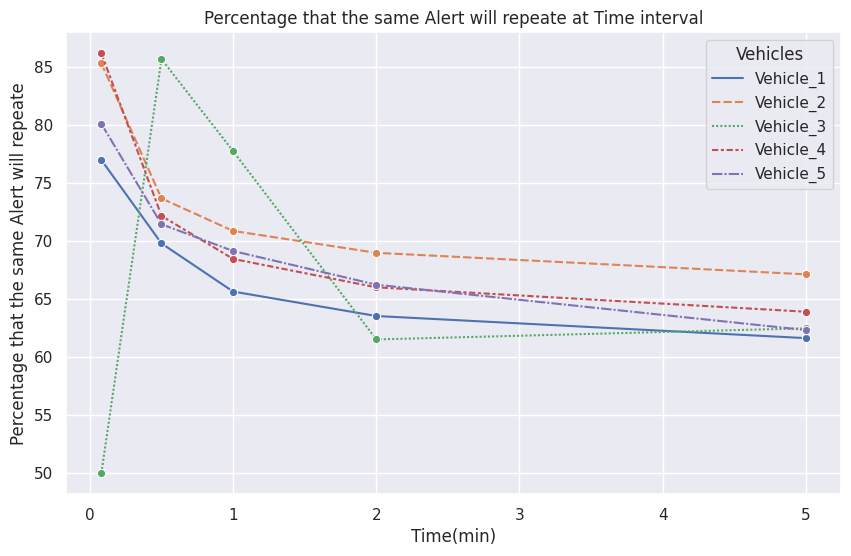

In [40]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=merged_df, x ='every(min)', y='follow_itself', hue='source', marker="o", style='source')

plt.title('Percentage that the same Alert will repeate at Time interval')
plt.xlabel('Time(min)')
plt.ylabel('Percentage that the same Alert will repeate')
plt.legend(title='Vehicles')
plt.show()

In [41]:
merged_df = pd.concat([follow_up_df_Veh_1[["every(min)" , "follow_itself",'source']],
                       follow_up_df_Veh_2[["every(min)" , "follow_itself",'source']],
                       follow_up_df_Veh_4[["every(min)" , "follow_itself",'source']],
                      ]
                      , keys=['Vehicle_1' , 'Vehicle_2' , 'Vehicle_3' , 'Vehicle_4' , 'Vehicle_5'] )

merged_df

every(min)  follow_itself     source
Vehicle_1 0        5.00      61.651206  Vehicle_1
          1        2.00      63.559322  Vehicle_1
          2        1.00      65.668268  Vehicle_1
          3        0.50      69.820205  Vehicle_1
          4        0.08      77.014218  Vehicle_1
Vehicle_2 0        5.00      67.153835  Vehicle_2
          1        2.00      69.007859  Vehicle_2
          2        1.00      70.895809  Vehicle_2
          3        0.50      73.695090  Vehicle_2
          4        0.08      85.349612  Vehicle_2
Vehicle_3 0        5.00      63.927676  Vehicle_4
          1        2.00      66.033542  Vehicle_4
          2        1.00      68.482587  Vehicle_4
          3        0.50      72.192691  Vehicle_4
          4        0.08      86.217949  Vehicle_4

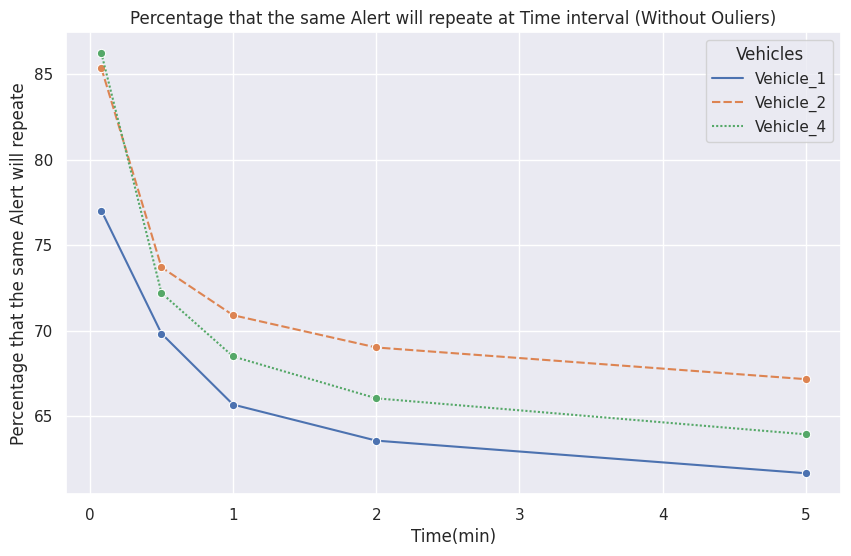

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=merged_df, x ='every(min)', y='follow_itself', hue='source', marker="o", style='source')

plt.title('Percentage that the same Alert will repeate at Time interval (Without Ouliers)')
plt.xlabel('Time(min)')
plt.ylabel('Percentage that the same Alert will repeate')
plt.legend(title='Vehicles')
plt.show()

#To Test

Higher speeds might lead to more FCW alerts, while lower speeds could result in more LDW alerts.

*   FCW - Forward Collision Warning
*   PCW - Pedestrian Collision Warning
*   HMW - Headway Monitoring and Warning (Unsafe Distance)
*   LDW - Lane Departure Warning

In [43]:
data.groupby("Alert")["Speed"].mean().reset_index()

,Alert,Speed
0,cas_fcw,36.366102
1,cas_hmw,35.316596
2,cas_ldw,50.923496
3,cas_pcw,17.527328


<Axes: xlabel='Speed', ylabel='Count'>

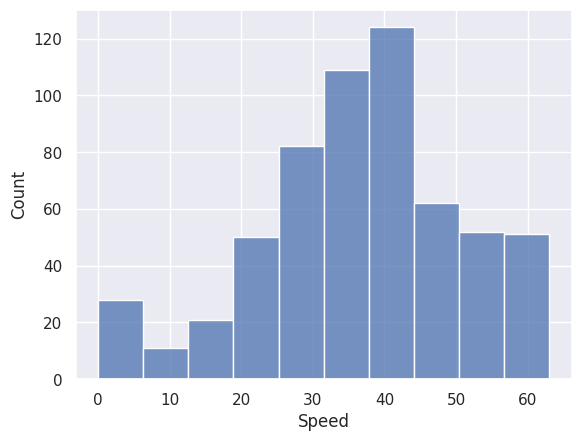

In [44]:
sns.histplot(data[data.Alert == "cas_fcw"].Speed , bins = 10)

<Axes: xlabel='Speed', ylabel='Count'>

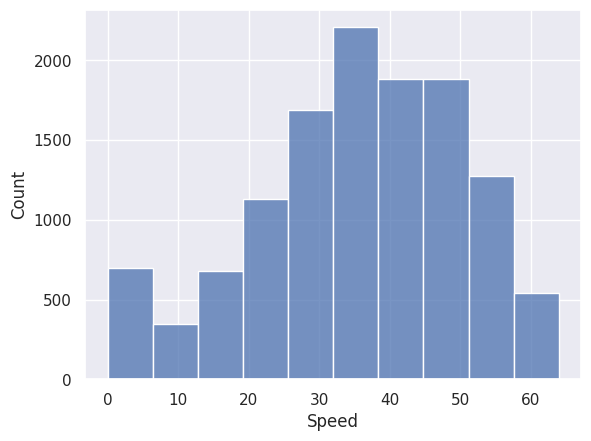

In [45]:
sns.histplot(data[data.Alert == "cas_hmw"].Speed , bins = 10)

<Axes: xlabel='Speed', ylabel='Count'>

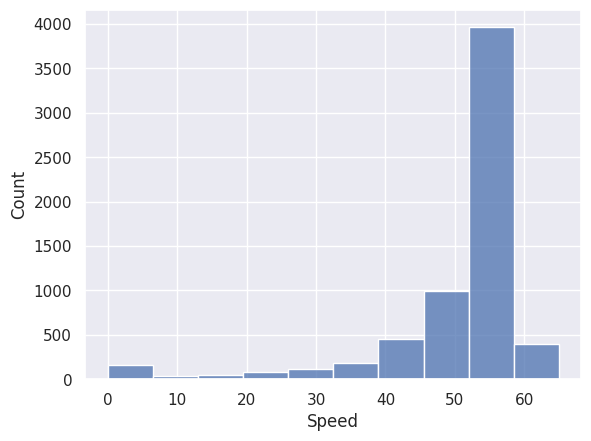

In [46]:
sns.histplot(data[data.Alert == "cas_ldw"].Speed , bins = 10)

<Axes: xlabel='Speed', ylabel='Count'>

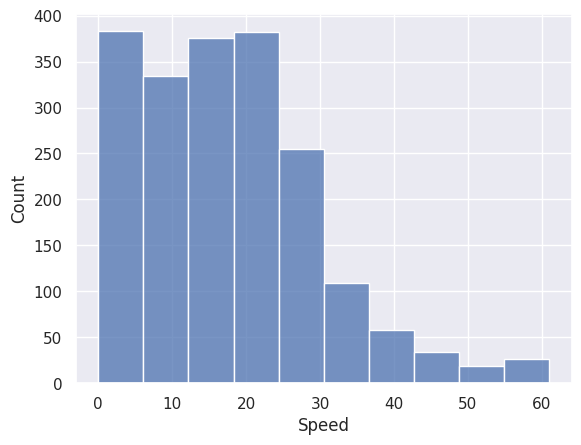

In [47]:
sns.histplot(data[data.Alert == "cas_pcw"].Speed , bins = 10)

In [48]:
data.Alert

0        cas_ldw
1        cas_ldw
2        cas_ldw
3        cas_ldw
4        cas_ldw
          ...   
21320    cas_pcw
21321    cas_pcw
21322    cas_hmw
21323    cas_pcw
21324    cas_hmw
Name: Alert, Length: 21325, dtype: object

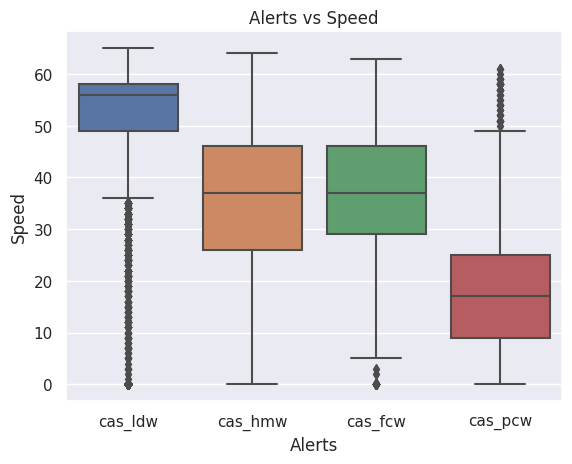

In [49]:
sns.boxplot(data = data , x = "Alert" , y = "Speed")
plt.title("Alerts vs Speed")
plt.xlabel("Alerts")
plt.ylabel("Speed")
plt.show()

In [50]:
data_Veh_1[data_Veh_1.Alert == "cas_ldw"]

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour,total_seconds
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48,5,20196
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58,5,20207
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57,5,20224
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49,5,20251
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58,5,20288
...,...,...,...,...,...,...,...,...,...
5674,cas_ldw,2022-08-23,08:53:20,12.853146,80.066881,2846,47,8,32000
5675,cas_ldw,2022-08-23,08:53:29,12.854206,80.067676,2846,56,8,32009
5677,cas_ldw,2022-08-23,08:54:23,12.857703,80.070357,2846,58,8,32063
5678,cas_ldw,2022-08-23,08:54:51,12.862588,80.073590,2846,58,8,32091


In [51]:
def alert_vs_speed(Vehicle_df : pd.DataFrame):
  """
  Takes in Vehicle DataFrame and evaluates the mean speed the alert was encountered with at each day of its recording
  """
  cas_ldw = []
  cas_hmw = []
  cas_fcw = []
  cas_pcw = []

  for alert in ["cas_ldw" , "cas_hmw" , "cas_fcw" , "cas_pcw"]:
    df = Vehicle_df[Vehicle_df.Alert == alert].reset_index(drop = True)
    for date in range(len(df.Date.unique())):
      df_2 = df[df.Date == df.Date.unique()[date]]

      if alert == "cas_ldw":
        cas_ldw.append(round(df_2.Speed.mean(),2))
      elif alert == "cas_hmw":
        cas_hmw.append(round(df_2.Speed.mean(),2))
      elif alert == "cas_fcw":
        cas_fcw.append(round(df_2.Speed.mean(),2))
      else:
        cas_pcw.append(round(df_2.Speed.mean(),2))
  return cas_ldw , cas_hmw , cas_fcw , cas_pcw

In [52]:
cas_ldw_veh_1 , cas_hmw_veh_1 , cas_fcw_veh_1 , cas_pcw_veh_1 = alert_vs_speed(data_Veh_1)
cas_ldw_veh_2 , cas_hmw_veh_2 , cas_fcw_veh_2 , cas_pcw_veh_2 = alert_vs_speed(data_Veh_2)
cas_ldw_veh_3 , cas_hmw_veh_3 , cas_fcw_veh_3 , cas_pcw_veh_3 = alert_vs_speed(data_Veh_3)
cas_ldw_veh_4 , cas_hmw_veh_4 , cas_fcw_veh_4 , cas_pcw_veh_4 = alert_vs_speed(data_Veh_4)
cas_ldw_veh_5 , cas_hmw_veh_5 , cas_fcw_veh_5 , cas_pcw_veh_5 = alert_vs_speed(data_Veh_5)

In [53]:
len(cas_ldw_veh_1) , len(cas_hmw_veh_1) , len(cas_fcw_veh_1) , len(cas_pcw_veh_1)

(42, 41, 38, 42)

In [54]:
len(cas_ldw_veh_2) , len(cas_hmw_veh_2) , len(cas_fcw_veh_2) , len(cas_pcw_veh_2)

(35, 36, 34, 37)

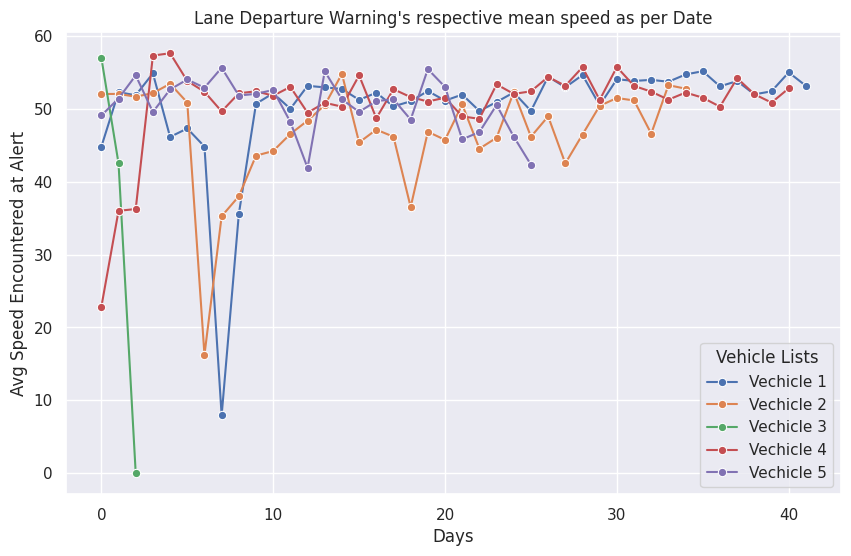

In [55]:
# X-axis values (assuming they are the same for all lists)
x_values = [1, 2, 3, 4, 5]

# Create individual line plots
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(cas_ldw_veh_1)), y=cas_ldw_veh_1, label='Vechicle 1', marker="o")
sns.lineplot(x=range(len(cas_ldw_veh_2)), y=cas_ldw_veh_2, label='Vechicle 2', marker="o")
sns.lineplot(x=range(len(cas_ldw_veh_3)), y=cas_ldw_veh_3, label='Vechicle 3', marker="o")
sns.lineplot(x=range(len(cas_ldw_veh_4)), y=cas_ldw_veh_4, label='Vechicle 4', marker="o")
sns.lineplot(x=range(len(cas_ldw_veh_5)), y=cas_ldw_veh_5, label='Vechicle 5', marker="o")

plt.title("Lane Departure Warning's respective mean speed as per Date")
plt.xlabel('Days')
plt.ylabel('Avg Speed Encountered at Alert')
plt.legend(title='Vehicle Lists')
plt.show()

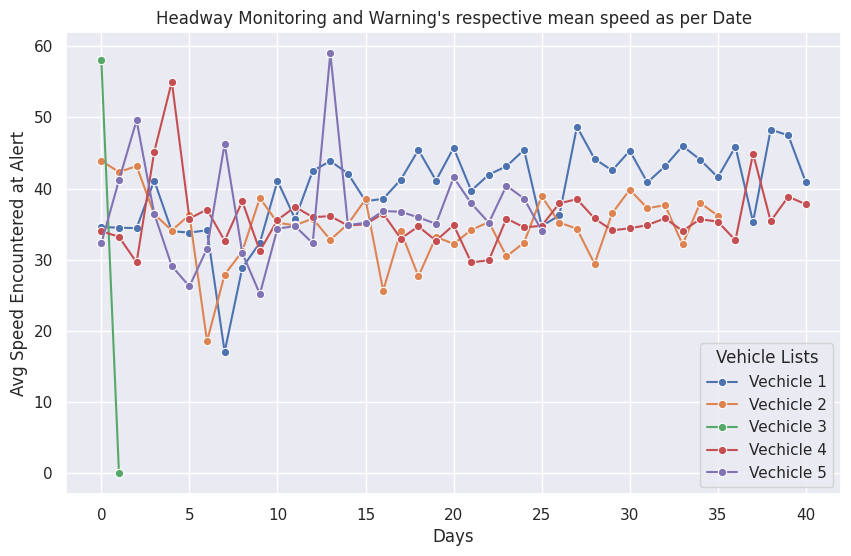

In [56]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(cas_hmw_veh_1)), y=cas_hmw_veh_1, label='Vechicle 1', marker="o")
sns.lineplot(x=range(len(cas_hmw_veh_2)), y=cas_hmw_veh_2, label='Vechicle 2', marker="o")
sns.lineplot(x=range(len(cas_hmw_veh_3)), y=cas_hmw_veh_3, label='Vechicle 3', marker="o")
sns.lineplot(x=range(len(cas_hmw_veh_4)), y=cas_hmw_veh_4, label='Vechicle 4', marker="o")
sns.lineplot(x=range(len(cas_hmw_veh_5)), y=cas_hmw_veh_5, label='Vechicle 5', marker="o")

plt.title("Headway Monitoring and Warning's respective mean speed as per Date")
plt.xlabel('Days')
plt.ylabel('Avg Speed Encountered at Alert')
plt.legend(title='Vehicle Lists')
plt.show()

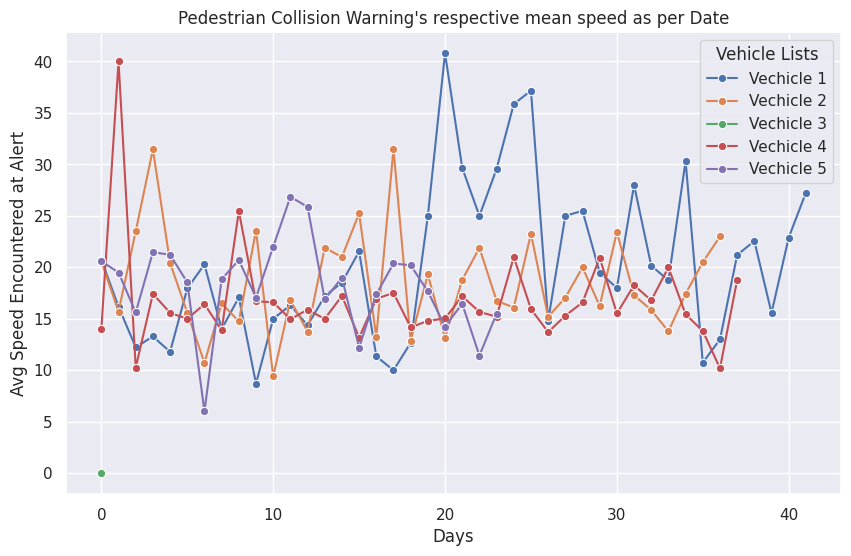

In [57]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(cas_pcw_veh_1)), y=cas_pcw_veh_1, label='Vechicle 1', marker="o")
sns.lineplot(x=range(len(cas_pcw_veh_2)), y=cas_pcw_veh_2, label='Vechicle 2', marker="o")
sns.lineplot(x=range(len(cas_pcw_veh_3)), y=cas_pcw_veh_3, label='Vechicle 3', marker="o")
sns.lineplot(x=range(len(cas_pcw_veh_4)), y=cas_pcw_veh_4, label='Vechicle 4', marker="o")
sns.lineplot(x=range(len(cas_pcw_veh_5)), y=cas_pcw_veh_5, label='Vechicle 5', marker="o")

plt.title("Pedestrian Collision Warning's respective mean speed as per Date")
plt.xlabel('Days')
plt.ylabel('Avg Speed Encountered at Alert')
plt.legend(title='Vehicle Lists')
plt.show()

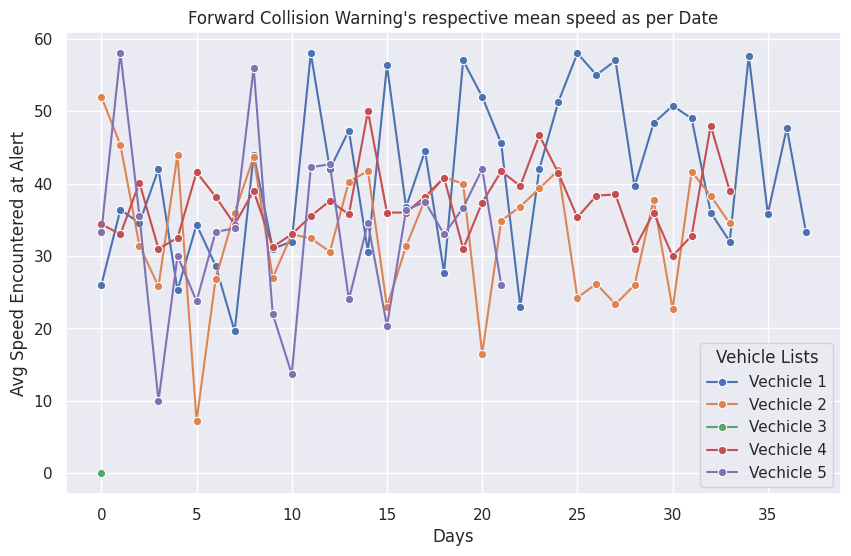

In [58]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(cas_fcw_veh_1)), y=cas_fcw_veh_1, label='Vechicle 1', marker="o")
sns.lineplot(x=range(len(cas_fcw_veh_2)), y=cas_fcw_veh_2, label='Vechicle 2', marker="o")
sns.lineplot(x=range(len(cas_fcw_veh_3)), y=cas_fcw_veh_3, label='Vechicle 3', marker="o")
sns.lineplot(x=range(len(cas_fcw_veh_4)), y=cas_fcw_veh_4, label='Vechicle 4', marker="o")
sns.lineplot(x=range(len(cas_fcw_veh_5)), y=cas_fcw_veh_5, label='Vechicle 5', marker="o")

plt.title("Forward Collision Warning's respective mean speed as per Date")
plt.xlabel('Days')
plt.ylabel('Avg Speed Encountered at Alert')
plt.legend(title='Vehicle Lists')
plt.show()

In [59]:
print(len(cas_ldw_veh_1)  , len(cas_ldw_veh_2)  , len(cas_ldw_veh_4) , len(cas_ldw_veh_5))
print(len(cas_hmw_veh_1)  , len(cas_hmw_veh_2)  , len(cas_hmw_veh_4) , len(cas_hmw_veh_5))
print(len(cas_pcw_veh_1)  , len(cas_pcw_veh_2)  , len(cas_pcw_veh_4) , len(cas_pcw_veh_5))
print(len(cas_fcw_veh_1)  , len(cas_fcw_veh_2)  , len(cas_fcw_veh_4) , len(cas_fcw_veh_5))

42 35 41 26
41 36 41 26
42 37 38 24
38 34 34 22


In [60]:
import numpy as np

In [61]:
cas_ldw_veh_1 = cas_ldw_veh_1[:30]
cas_ldw_veh_2 = cas_ldw_veh_2[:30]
cas_ldw_veh_4 = cas_ldw_veh_4[:30]
cas_ldw_veh_5.extend([0]*4)

In [62]:
cas_hmw_veh_1 = cas_hmw_veh_1[:30]
cas_hmw_veh_2 = cas_hmw_veh_2[:30]
cas_hmw_veh_4 = cas_hmw_veh_4[:30]
cas_hmw_veh_5.extend([0]*4)

In [63]:
cas_pcw_veh_1 = cas_pcw_veh_1[:30]
cas_pcw_veh_2 = cas_pcw_veh_2[:30]
cas_pcw_veh_4 = cas_pcw_veh_4[:30]
cas_pcw_veh_5.extend([0]*6)

In [64]:
cas_fcw_veh_1 = cas_fcw_veh_1[:30]
cas_fcw_veh_2 = cas_fcw_veh_2[:30]
cas_fcw_veh_4 = cas_fcw_veh_4[:30]
cas_fcw_veh_5.extend([0]*8)

In [65]:
cas_ldw_veh_3

[57.0, 42.5, 0.0]

In [66]:
print(len(cas_ldw_veh_1)  , len(cas_ldw_veh_2)  , len(cas_ldw_veh_4) , len(cas_ldw_veh_5))
print(len(cas_hmw_veh_1)  , len(cas_hmw_veh_2)  , len(cas_hmw_veh_4) , len(cas_hmw_veh_5))
print(len(cas_pcw_veh_1)  , len(cas_pcw_veh_2)  , len(cas_pcw_veh_4) , len(cas_pcw_veh_5))
print(len(cas_fcw_veh_1)  , len(cas_fcw_veh_2)  , len(cas_fcw_veh_4) , len(cas_fcw_veh_5))

30 30 30 30
30 30 30 30
30 30 30 30
30 30 30 30


In [67]:
ldw_avg = (np.array(cas_ldw_veh_1) + np.array(cas_ldw_veh_2) + np.array(cas_ldw_veh_4) + np.array(cas_ldw_veh_5))/4
hmw_avg = (np.array(cas_hmw_veh_1) + np.array(cas_hmw_veh_2) + np.array(cas_hmw_veh_4) + np.array(cas_hmw_veh_5))/4
pcw_avg = (np.array(cas_pcw_veh_1) + np.array(cas_pcw_veh_2) + np.array(cas_pcw_veh_4) + np.array(cas_pcw_veh_5))/4
fcw_avg = (np.array(cas_fcw_veh_1) + np.array(cas_fcw_veh_2) + np.array(cas_fcw_veh_4) + np.array(cas_fcw_veh_5))/4

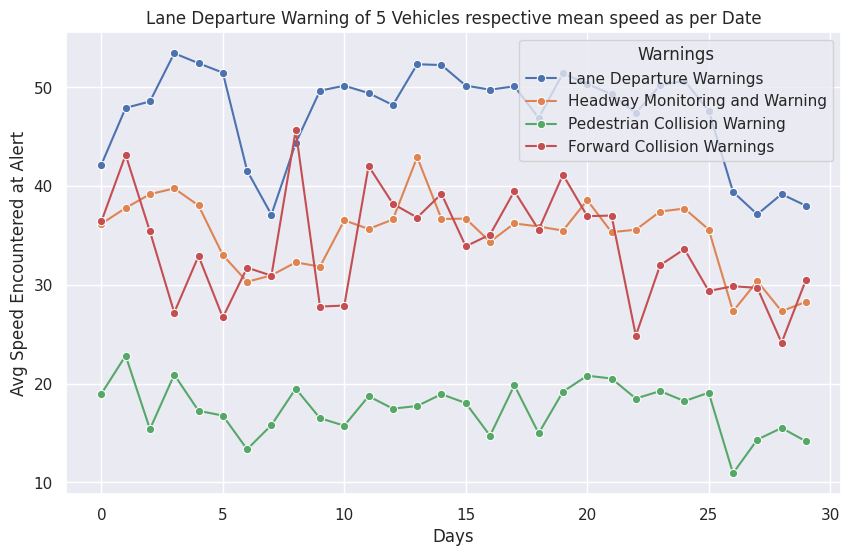

In [68]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(ldw_avg.shape[0]), y=ldw_avg, label='Lane Departure Warnings', marker="o")
sns.lineplot(x=range(hmw_avg.shape[0]), y=hmw_avg, label='Headway Monitoring and Warning', marker="o")
sns.lineplot(x=range(pcw_avg.shape[0]), y=pcw_avg, label='Pedestrian Collision Warning', marker="o")
sns.lineplot(x=range(fcw_avg.shape[0]), y=fcw_avg, label='Forward Collision Warnings', marker="o")


plt.title("Lane Departure Warning of 5 Vehicles respective mean speed as per Date")
plt.xlabel('Days')
plt.ylabel('Avg Speed Encountered at Alert')
plt.legend(title='Warnings')
plt.show()

*   FCW - Forward Collision Warning
*   PCW - Pedestrian Collision Warning
*   HMW - Headway Monitoring and Warning (Unsafe Distance)
*   LDW - Lane Departure Warning

In [69]:
data

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour,total_seconds
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48,5,20196
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58,5,20207
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57,5,20224
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49,5,20251
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58,5,20288
...,...,...,...,...,...,...,...,...,...
21320,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30,18,65549
21321,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34,18,65581
21322,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24,18,65705
21323,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23,18,65795


In [70]:
import datetime

In [71]:
data["Date"] = pd.to_datetime(data["Date"])
data.head(10)

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour,total_seconds
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48,5,20196
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58,5,20207
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57,5,20224
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49,5,20251
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58,5,20288
5,cas_ldw,2022-06-01,05:38:21,12.903877,80.094272,2846,54,5,20301
6,cas_ldw,2022-06-01,05:38:41,12.906194,80.095953,2846,58,5,20321
7,cas_ldw,2022-06-01,05:40:21,12.915664,80.103135,2846,62,5,20421
8,cas_ldw,2022-06-01,05:41:17,12.918451,80.109058,2846,51,5,20477
9,cas_ldw,2022-06-01,05:41:25,12.919239,80.110028,2846,47,5,20485


In [72]:
days = []
for day in range(data.shape[0]):
  Day = data.Date[day].weekday()
  days.append(Day)

In [73]:
len(days)

21325

In [74]:
data["Day"] = pd.Series(days).map({0:"Monday" , 1: "Tuesday" , 2 : "Wednesday" , 3 : "Thursday" , 4 : "Friday" , 5 : "Saturday" , 6 : "Sunday"})

In [75]:
data

,Alert,Date,Time,Lat,Long,Vehicle,Speed,Hour,total_seconds,Day
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48,5,20196,Wednesday
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58,5,20207,Wednesday
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57,5,20224,Wednesday
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49,5,20251,Wednesday
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58,5,20288,Wednesday
...,...,...,...,...,...,...,...,...,...,...
21320,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30,18,65549,Wednesday
21321,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34,18,65581,Wednesday
21322,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24,18,65705,Wednesday
21323,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23,18,65795,Wednesday


In [76]:
Alert_by_Day = data.groupby("Day")["Alert"].count()
Alert_by_Day = Alert_by_Day.sort_values(ascending = False)
Alert_by_Day

Day
Friday       4172
Thursday     4131
Tuesday      4077
Wednesday    4017
Monday       3696
Saturday     1054
Sunday        178
Name: Alert, dtype: int64

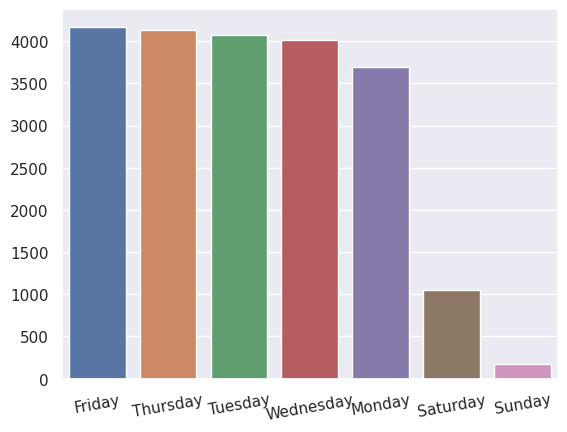

In [77]:
sns.barplot(x = list(Alert_by_Day.index) , y = list(Alert_by_Day.values) )
plt.xticks(rotation = 10)
plt.show()

https://openjicareport.jica.go.jp/pdf/12343851_02.pdf

During weekday

In [78]:
(Alert_by_Day.iloc[:5].sum() / (Alert_by_Day.iloc[5:].sum() + Alert_by_Day.iloc[:5].sum()))*100

94.22274325908559

94.2% more likely to get alert triggered during weekday

In [79]:
def plot_aprroximate(list_1 , list_2 , approx : int , title : str , xlabel : str , ylabel : str):
  """
  Smoothens the curve
  """
  list_x,list_y = list_1 , list_2
  plt.figure()
  poly = np.polyfit(list_x,list_y , approx)
  poly_y = np.poly1d(poly)(list_x)
  plt.plot(list_x,poly_y)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

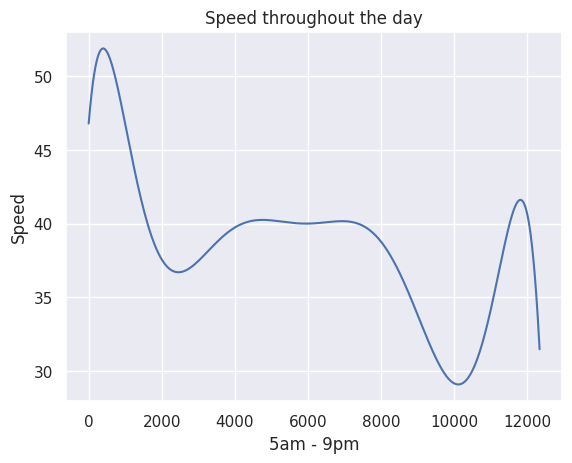

In [80]:
speed_by_seconds = data.groupby("total_seconds")["Speed"].mean()
plot_aprroximate(list_1 = range(speed_by_seconds.shape[0]) , list_2 = speed_by_seconds.values , approx = 8 , title = "Speed throughout the day" , xlabel = "5am - 9pm" , ylabel = "Speed")

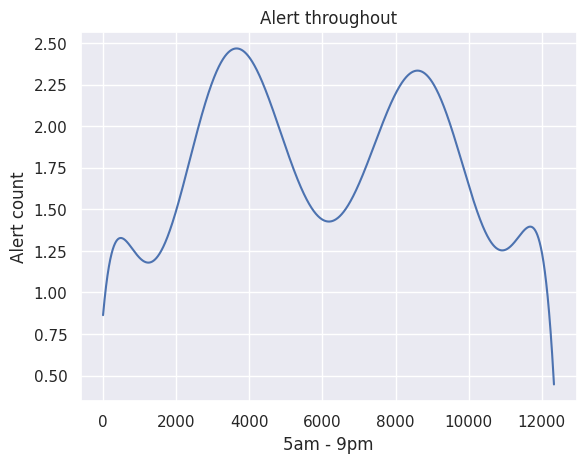

In [84]:
alert_by_seconds = data.groupby("total_seconds")["Alert"].count()
plot_aprroximate(list_1 = range(speed_by_seconds.shape[0]) , list_2 = alert_by_seconds.values , approx = 8 , title = "Alert throughout" , xlabel = "5am - 9pm" , ylabel = "Alert count")

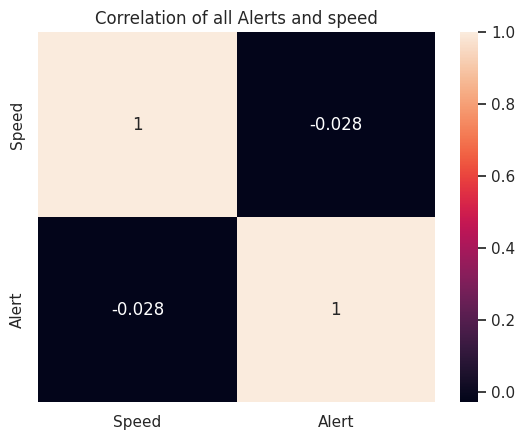

In [100]:
sns.heatmap(pd.concat([speed_by_seconds,alert_by_seconds],axis=1).corr() , annot=True)
plt.title("Correlation of all Alerts and speed")
plt.show()

In [108]:
data_hmw = data[data["Alert"] == "cas_hmw"].reset_index(drop = True)
data_ldw = data[data["Alert"] == "cas_ldw"].reset_index(drop = True)
data_pcw = data[data["Alert"] == "cas_pcw"].reset_index(drop = True)
data_fcw = data[data["Alert"] == "cas_fcw"].reset_index(drop = True)

In [109]:
speed_by_seconds_hmw = data_hmw.groupby("total_seconds")["Speed"].mean()
speed_by_seconds_ldw = data_ldw.groupby("total_seconds")["Speed"].mean()
speed_by_seconds_pcw = data_pcw.groupby("total_seconds")["Speed"].mean()
speed_by_seconds_fcw = data_fcw.groupby("total_seconds")["Speed"].mean()

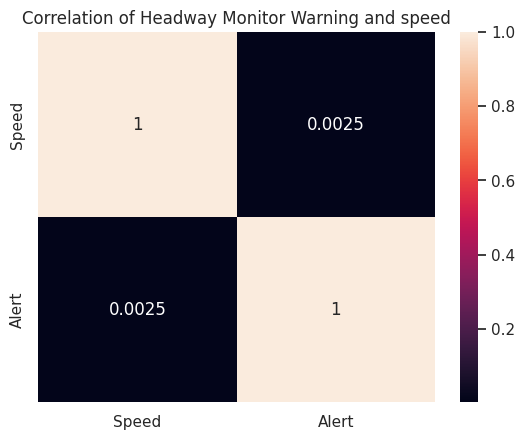

In [110]:
sns.heatmap(pd.concat([speed_by_seconds_hmw,alert_by_seconds],axis=1).dropna().corr() , annot=True)
plt.title("Correlation of Headway Monitor Warning and speed")
plt.show()

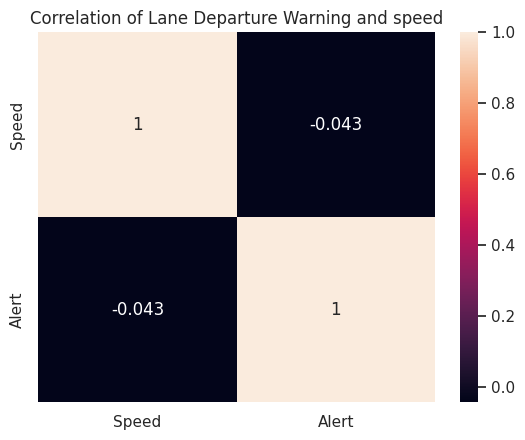

In [111]:
sns.heatmap(pd.concat([speed_by_seconds_ldw,alert_by_seconds],axis=1).dropna().corr() , annot=True)
plt.title("Correlation of Lane Departure Warning and speed")
plt.show()

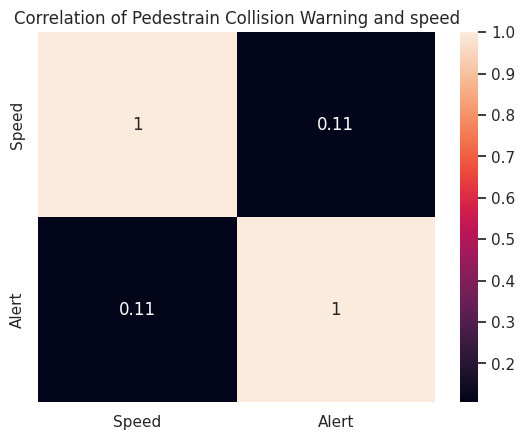

In [112]:
sns.heatmap(pd.concat([speed_by_seconds_pcw,alert_by_seconds],axis=1).dropna().corr() , annot=True)
plt.title("Correlation of Pedestrain Collision Warning and speed")
plt.show()

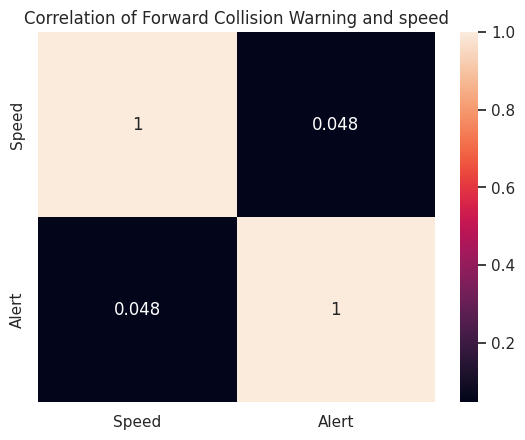

In [113]:
sns.heatmap(pd.concat([speed_by_seconds_fcw,alert_by_seconds],axis=1).dropna().corr() , annot=True)
plt.title("Correlation of Forward Collision Warning and speed")
plt.show()